In [2]:
import json
import string
import pandas as pd
import numpy as np
import re
import pip
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# open txt file
file_object = open('/content/drive/My Drive/data/covid-label.txt')
try:
    file_content = file_object.read()
finally:
    file_object.close()
# split by ",""
result = file_content.split(',')

label = []
for i in result:
   label.append(i)

label = list(map(int, label))


from datetime import datetime
def convert(time):
  time = datetime.strptime(time,'%a %b %d %H:%M:%S %z %Y');
  return time.strftime('%Y-%m-%d')

In [4]:

def process_json_data(read_data_filepath, label):
  with open(read_data_filepath, 'r') as f:
    favorite_count = []
    geo_enabled = []
    location = []
    created_time = []
    fllowers_count = []
    following_count = []
    post_count = []
    for line in f:
      line = json.loads(line)
      favorite_count.append(line[0]['favorite_count'])
      geo_enabled.append(line[0]['user']['geo_enabled'])
      location.append(line[0]['user']['location'])
      created_time.append(convert(line[0]['user']["created_at"]))
      fllowers_count.append(line[0]['user']['followers_count'])
      following_count.append(line[0]['user']['friends_count'])
      post_count.append(line[0]['user']['statuses_count'])

    df_data = pd.DataFrame({'favorite_count':favorite_count, 'created_time':created_time, 'geo_enabled':geo_enabled, 'location':location, 'fllowers_count':fllowers_count, 'following_count':following_count, 'post_count':post_count, 'label':label})
    return df_data[['created_time', 'favorite_count', 'geo_enabled', 'location', 'fllowers_count', 'following_count', 'post_count', 'label']]
    

In [5]:
df_covid = process_json_data('/content/drive/My Drive/data/covid.data.jsonl', label)
df_covid["created_time"] = pd.to_datetime(df_covid["created_time"])

# a list of events, and each event is a list of tweets (source tweet + reactions)
print("Number of test data =", len(df_covid))

Number of test data = 17458


In [6]:
df_covid

,created_time,favorite_count,geo_enabled,location,fllowers_count,following_count,post_count,label
0,2018-06-25,280,False,Worldwide,26179,18,2512,0
1,2009-06-04,658,True,"Austin, Texas",248090,59111,94186,0
2,2007-03-22,179,False,"Washington, DC",3948552,266,782525,1
3,2016-01-15,2306,True,"Melbourne, Victoria",176217,1287,26895,0
4,2011-01-05,2113,True,"Washington, DC",182389,1229,17452,0
...,...,...,...,...,...,...,...,...
17453,2008-03-28,11419,True,,789505,84254,250958,0
17454,2012-01-07,866,True,,98094,914,27831,0
17455,2015-12-14,1007,True,"Washington, DC",69919,88,8346,0
17456,2014-08-30,366,True,UK,6131,593,485,0


In [7]:
df_rumour = df_covid.loc[df_covid['label'] == 1]
df_non_rumour = df_covid.loc[df_covid['label'] == 0]

In [8]:
"""
USER CREATED_TIME
"""
date_now = datetime(2021, 5, 2)
# df_covid.created_time = (date_now - df_covid.created_time).astype('timedelta64[D]')
print("Rumour user average account created time: ", df_rumour.created_time.mean())
print("Non-rumour user average account created time: ", df_non_rumour.created_time.mean())

Rumour user average account created time:  2010-12-01 12:27:10.188681984
Non-rumour user average account created time:  2011-04-30 10:58:55.568431872


Post counts in rumour:  151732.593081761
Post counts in rumour:  112456.80797832114


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


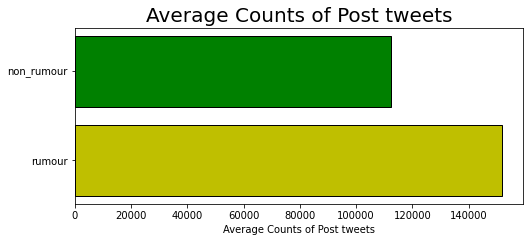

In [9]:
"""
POST COUNT
"""
post_rumour = df_rumour.post_count.mean()
post_non_rumour = df_non_rumour.post_count.mean()
print("Post counts in rumour: ", post_rumour)
print("Post counts in rumour: ", post_non_rumour)

# Plot
fig, ax = plt.subplots(figsize = (8,4))
name_list = ['rumour', 'non_rumour']
num_list = [post_rumour, post_non_rumour]
y_pos = np.arange(len(num_list))
ax.barh(y_pos, num_list, align='center', color = 'ygb', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(name_list)
ax.set_xlabel("Average Counts of Post tweets")
ax.set_title("Average Counts of Post tweets", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()

Favourite counts in rumour:  5500.627672955975
Favourite counts in rumour:  14299.076947315352


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


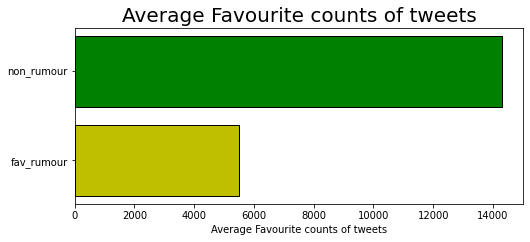

In [10]:
"""
TWEET FAV_COUNT
"""
fav_rumour = df_rumour.favorite_count.mean()
fav_non_rumour = df_non_rumour.favorite_count.mean()
print("Favourite counts in rumour: ", fav_rumour)
print("Favourite counts in rumour: ", fav_non_rumour)

# Plot
fig, ax = plt.subplots(figsize = (8,4))
name_list = ['fav_rumour', 'non_rumour']
num_list = [fav_rumour, fav_non_rumour]
y_pos = np.arange(len(num_list))
ax.barh(y_pos, num_list, align='center', color = 'ygb', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(name_list)
ax.set_xlabel("Average Favourite counts of tweets")
ax.set_title("Average Favourite counts of tweets", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()


In [ ]:
"""
USER GEO-ENABLED
"""
# Rumour
df_rumour.loc[:,'geo_enabled'].value_counts()
true_rumour = df_rumour.loc[:,'geo_enabled'].value_counts()[0] / len(df_rumour)
false_rumour = df_rumour.loc[:,'geo_enabled'].value_counts()[1] / len(df_rumour)
print("Geo-enabled in rumour account for ", true_rumour)
# print("Geo-enabled false in rumour account for ", false_rumour)

# Non-rumour
df_non_rumour.loc[:,'geo_enabled'].value_counts()
true_non_rumour = df_non_rumour.loc[:,'geo_enabled'].value_counts()[0] / len(df_non_rumour)
false_non_rumour = df_non_rumour.loc[:,'geo_enabled'].value_counts()[1] / len(df_non_rumour)
print("Geo-enabled in non_rumour account for ", true_non_rumour)
# print("Geo-enabled false in non_rumour account for ", false_non_rumour)

Geo-enabled in rumour account for  0.4050314465408805
Geo-enabled in non_rumour account for  0.4189563902193093


Followers in rumour accounts:  4776971.098113207
Followers in non-rumour accounts:  5409719.314028233
Average Followings in rumour accounts:  7196.0427672955975
Average Followings in non-rumour accounts:  7931.995777665742
Ratio of rumour:  663.8330611129037
Ratio of non-rumour:  682.0123794392924


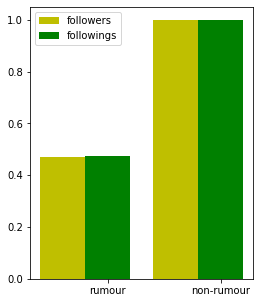

In [12]:
"""
Account Fllowers and Followings
"""
# Followers
followers_rumour = df_rumour.fllowers_count.mean()
followers_non_rumour = df_non_rumour.fllowers_count.mean()
print("Followers in rumour accounts: ", followers_rumour)
print("Followers in non-rumour accounts: ", followers_non_rumour)

# Followings
following_rumour = df_rumour.following_count.mean()
following_non_rumour = df_non_rumour.following_count.mean()
print("Average Followings in rumour accounts: ", following_rumour)
print("Average Followings in non-rumour accounts: ", following_non_rumour)

# ratio
ratio_rumour = followers_rumour / following_rumour
ratio_non_rumour = followers_non_rumour / following_non_rumour
print("Ratio of rumour: ", ratio_rumour)
print("Ratio of non-rumour: ", ratio_non_rumour)

# plot
followers_rumour = followers_rumour / (followers_rumour + followers_non_rumour)
followers_non_rumour = followers_non_rumour / (followers_non_rumour + followers_rumour)
following_rumour = following_rumour / (following_rumour + following_non_rumour)
following_non_rumour = following_non_rumour / (following_non_rumour + following_rumour)

fig, ax = plt.subplots(figsize = (4, 5))
name_list = ['rumour', 'non-rumour']
num_list = [followers_rumour, followers_non_rumour]
num_list1 = [following_rumour, following_non_rumour]
x =list(range(len(num_list)))
total_width, n = 0.8, 2
width = total_width / n
plt.bar(x, num_list, width=width, label='followers',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list1, width=width, label='followings',tick_label = name_list,fc = 'g')
plt.legend()
plt.show()

